In [1]:
from __future__ import division
import sympy
import numpy
%matplotlib notebook
from scipy.integrate import odeint
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
sympy.init_printing(use_latex='mathjax')
from ipywidgets import interact

## Question 3

<IPython.core.display.Javascript object>


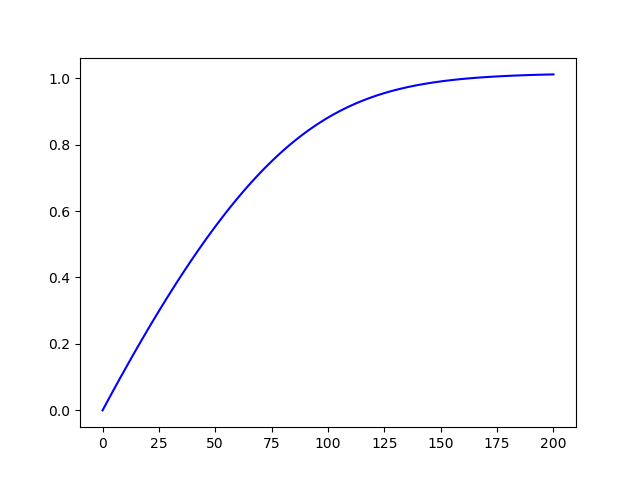

<IPython.core.display.Javascript object>


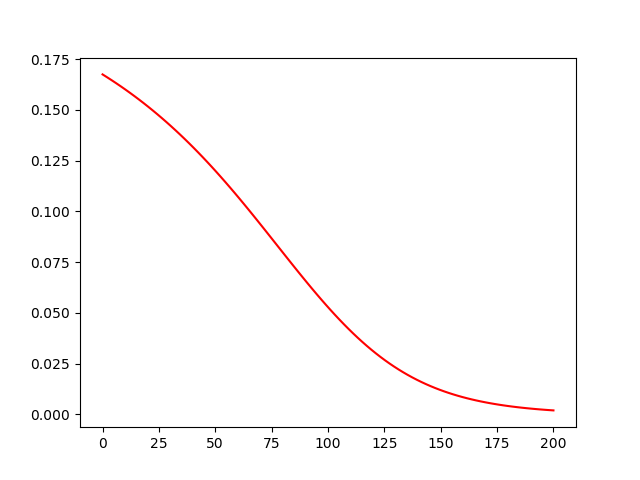

<IPython.core.display.Javascript object>


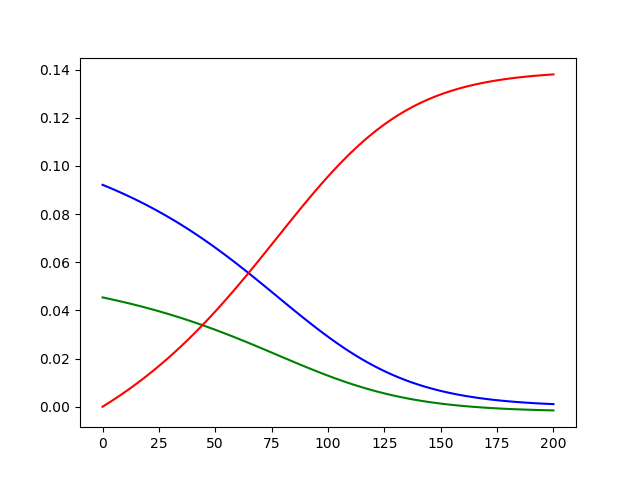

In [2]:
Fto=40
Po=5*101.325
Fao=0.33*40
Fbo=0.67*40
Fco=0
k=0.05/101.325
R=8.314
T=170+273
Qo=((Fao+Fbo+Fco)*R*T)/Po

'a'
def func1(x,w):
    Q=((Fao+Fbo-2*Fao*x)*R*T)/Po
    
    ra=-(k)*((Fbo-2*Fao*x)/(40-2*Fao*x))*Po
    
    dxdw=-(ra/Fao)
    
    return (dxdw)

w=numpy.linspace(0,200,100)
xint=odeint(func1,0.0,w)
ra=-(k)*((Fbo-2*Fao*xint[:,0])/(40-2*Fao*xint[:,0]))*Po
Q=((Fao+Fbo-2*Fao*(xint[:,0]))*R*T)/Po
Fa=Fao-Fao*(xint[:,0])
Fb=Fbo-2*Fao*(xint[:,0])
Fc=Fao*xint[:,0]
Ca=Fa/Q
Cb=Fb/Q
Cc=Fc/Q

plt.figure(1)
plt.plot(w,xint,'b')
plt.figure(2)
plt.plot(w,-ra,'r')
plt.figure(3)
plt.plot(w,Ca,'g')
plt.plot(w,Cb,'b')
plt.plot(w,Cc,'r')


    

In [3]:
'b'
mavg=30/1000    #kg/mol
mass=mavg*Fto   #kg/min
por=0.4
dr=0.085        #m
Across=numpy.pi*(dr/2)**2
dp=3/1000       #m
vis=2e-5
Pb=1000        
G=mass/(60*Across)   #kg/m2s
den=(Po*mavg)/(R*T)
Kp=-(G/(den*dp))*((1-por)/por**3)*(150*((vis*(1-por))/dp)+1.75*G)
Kp

-18064037.051428627

<IPython.core.display.Javascript object>


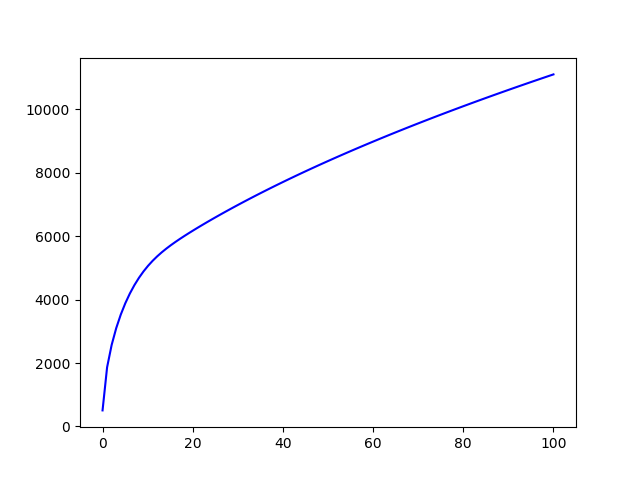

<IPython.core.display.Javascript object>


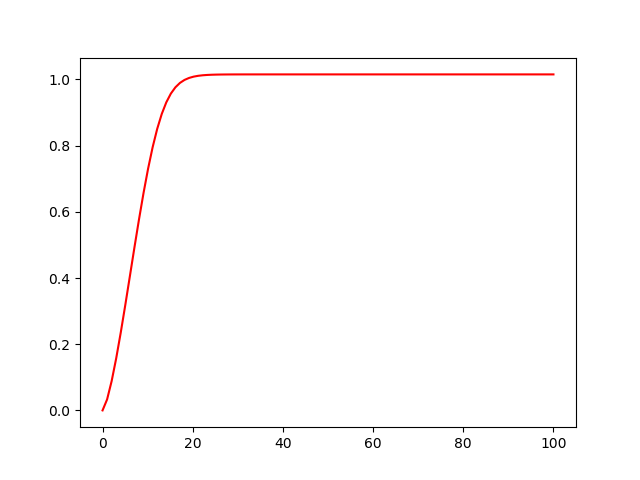

In [36]:
Fto=40
Po=5*101.325
Fao=0.33*40
Fbo=0.67*40
Fco=0
k=0.05/101.325
R=8.314
T=170+273
Qo=((Fao+Fbo+Fco)*R*T)/Po

'a'
def func2(var,w):
    x, P = var
    
    Ft = Fto-2*Fao*x
    Q=(Ft*R*T)/P
    ra=-(k)*((Fbo-2*Fao*x)/(40-2*Fao*x))*P
    
    dxdw=-(ra/Fao)
    dPdw = 3184.4*(Po/P)*(Ft/Fto)
    
    return (dxdw, dPdw)

w=numpy.linspace(0,100,100)
ans=odeint(func2,[0.0, Po],w)
P = ans[:,1]
x = ans[:,0]
ra=-(k)*((Fbo-2*Fao*ans[:,0])/(40-2*Fao*ans[:,0]))*P
Q=((Fao+Fbo-2*Fao*(ans[:,0]))*R*T)/P
Fa=Fao-Fao*(ans[:,0])
Fb=Fbo-2*Fao*(ans[:,0])
Fc=Fao*ans[:,0]
Ca=Fa/Q
Cb=Fb/Q
Cc=Fc/Q

plt.figure(4)
plt.plot(w,P,'b')
plt.figure(5)
plt.plot(w,x,'r')



## Question5

In [7]:
Cao=5
Cbo=0
Cbin=5
Qin=50/1000
k=0.25
Vo=1

def func(var,t):
    V,Ca,Cb = var
    
    ra = -k*Ca*Cb
    rb = -ra
    
    dvdt = Qin
    dcadt = (1/V)*(ra*V - Ca*dvdt)
    dcbdt = (1/V)*(Cbin*Qin + rb*V - Cb*dvdt)
    
    return (dvdt,dcadt,dcbdt)

time=numpy.linspace(0,20)
fint= odeint(func,[Vo,Cao,Cbo],time)
V = fint[:,0]
Ca = fint[:,1]
Cb = fint[:,2]
ra = -k*Ca*Cb

plt.plot(time,Cb,'b')
#plt.axis([0,20,0,6])

In [6]:
plt.plot(time,-ra,'r')
print('-ramax='+ str(max(-ra)))

-ramax=1.55318881485
